In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_pa = pd.read_excel("QualityDataset.xlsx", sheet_name="Patients")


In [3]:
df_pa.sample(5)  #show the samples of the data

,PatientMRN,FirstName,LastName,DateOfBirth,Gender,Race,Language
848,849,NaN,NaN,1968-09-17 03:37:44.520,NaN,White,English
274,275,NaN,NaN,1962-10-05 02:02:22.247,Female,Black/African-American,English
265,266,NaN,NaN,1966-02-07 16:59:22.959,Male,Black/African-American,English
513,514,NaN,NaN,1962-08-20 17:37:38.546,NaN,Black/African-American,English
590,591,NaN,NaN,1972-09-06 10:49:44.560,Male,Black/African-American,English


In [4]:
df_ed = pd.read_excel("QualityDataset.xlsx", sheet_name="EDVisits") # Reading the EDVisits sheet

In [5]:
df_av = pd.read_excel("QualityDataset.xlsx", sheet_name= "AmbulatoryVisits")  # Reading the AmbulatoryVisits sheet

In [6]:
df_dis = pd.read_excel("QualityDataset.xlsx", sheet_name="Discharges") # Reading the Discharges sheet

In [7]:
df_pro = pd.read_excel("QualityDataset.xlsx", sheet_name="Providers") # Reading the Providers sheet

In [8]:
df_rr = pd.read_excel("ReadmissionRegistryExcel.xlsx", sheet_name= "ReadmissionRegistry" ) 
# Reading the ReadmissionRegistry sheet

In [9]:
df_parr = pd.read_excel("ReadmissionRegistryExcel.xlsx", sheet_name= "Patients" ) 


In [10]:
df_parr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PatientMRN   945 non-null    int64         
 1   FirstName    0 non-null      float64       
 2   LastName     0 non-null      float64       
 3   DateOfBirth  945 non-null    datetime64[ns]
 4   Gender       878 non-null    object        
 5   Race         939 non-null    object        
 6   Language     937 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 51.8+ KB


1.Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [11]:
df_pa.iloc[101:201,1:3]


,FirstName,LastName
101,NaN,NaN
102,NaN,NaN
103,NaN,NaN
104,NaN,NaN
105,NaN,NaN
...,...,...
196,NaN,NaN
197,NaN,NaN
198,NaN,NaN
199,NaN,NaN


2.Create a jointplot on expected mortality & expected length of stay.

Text(0.5, 1.0, 'Jointplot on expected mortality & expected length of stay')

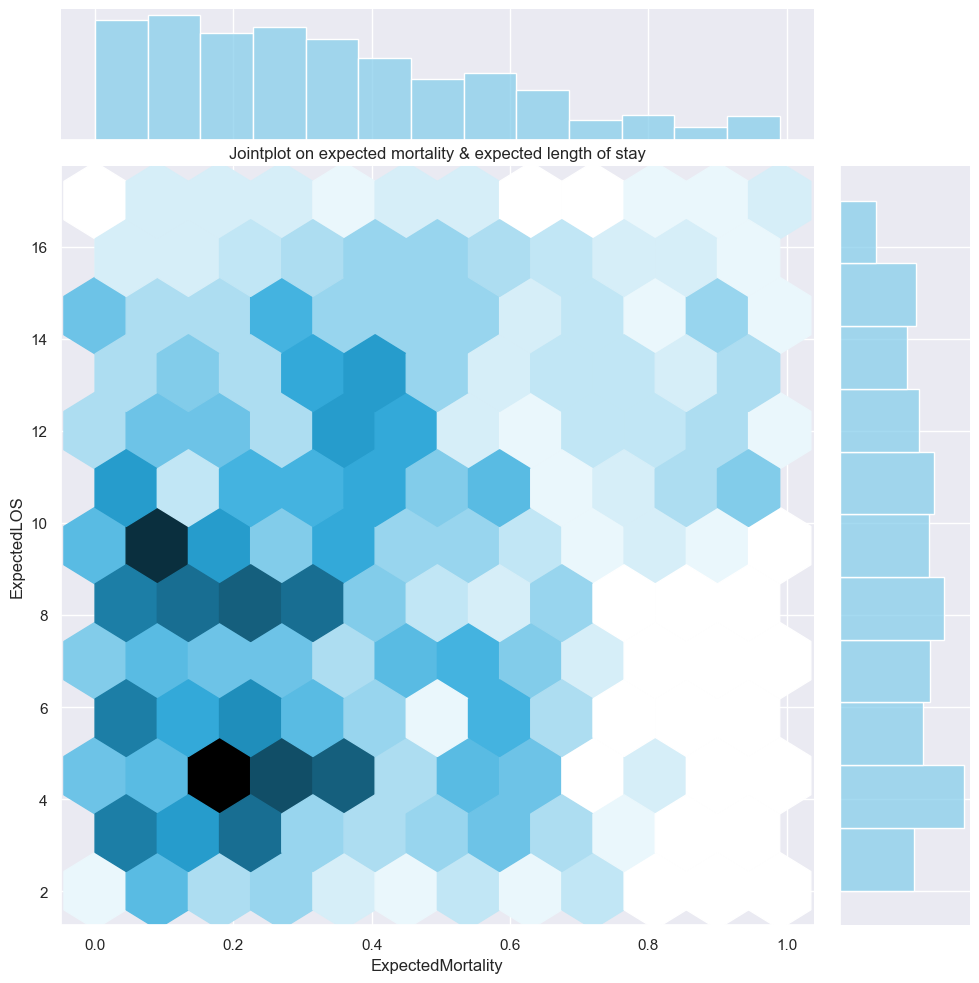

In [12]:
sns.set(style="darkgrid")
sns.jointplot(data=df_dis, x="ExpectedMortality", y="ExpectedLOS",kind='hex',color='skyblue',height=10)
plt.title("Jointplot on expected mortality & expected length of stay")

3.Find the number of null values in BloodPressureSystolic column.

In [13]:
df_av['BloodPressureSystolic'].isnull().sum()


124

4.Replace all the null values in ReadmissionFlag with 0.

In [14]:
df_rr['ReadmissionFlag'].fillna(0,inplace=True)
#df_rr['ReadmissionFlag'].isnull().sum()

In [15]:
df_rr =df_rr.copy()
df_rr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AdmissionID                720 non-null    int64         
 1   PatientID                  720 non-null    int64         
 2   AdmissionDate              720 non-null    datetime64[ns]
 3   DischargeDate              720 non-null    datetime64[ns]
 4   DischargeDisposition       720 non-null    object        
 5   Service                    720 non-null    object        
 6   PrimaryDiagnosis           720 non-null    object        
 7   ExpectedLOS                720 non-null    float64       
 8   ExpectedMortality          720 non-null    float64       
 9   ReadmissionFlag            720 non-null    float64       
 10  DaysToReadmission          194 non-null    float64       
 11  EDVisitAfterDischargeFlag  341 non-null    float64       
dtypes: datet

In [17]:
df_rr[['PatientID']] = df_rr[['PatientID']].astype('string')
df_rr[['AdmissionID']]=df_rr[['AdmissionID']].astype('string')
df_rr[['EDVisitAfterDischargeFlag']]=df_rr[['EDVisitAfterDischargeFlag']].astype('string')
df_rr[['ReadmissionFlag']]=df_rr[['ReadmissionFlag']].astype('string')

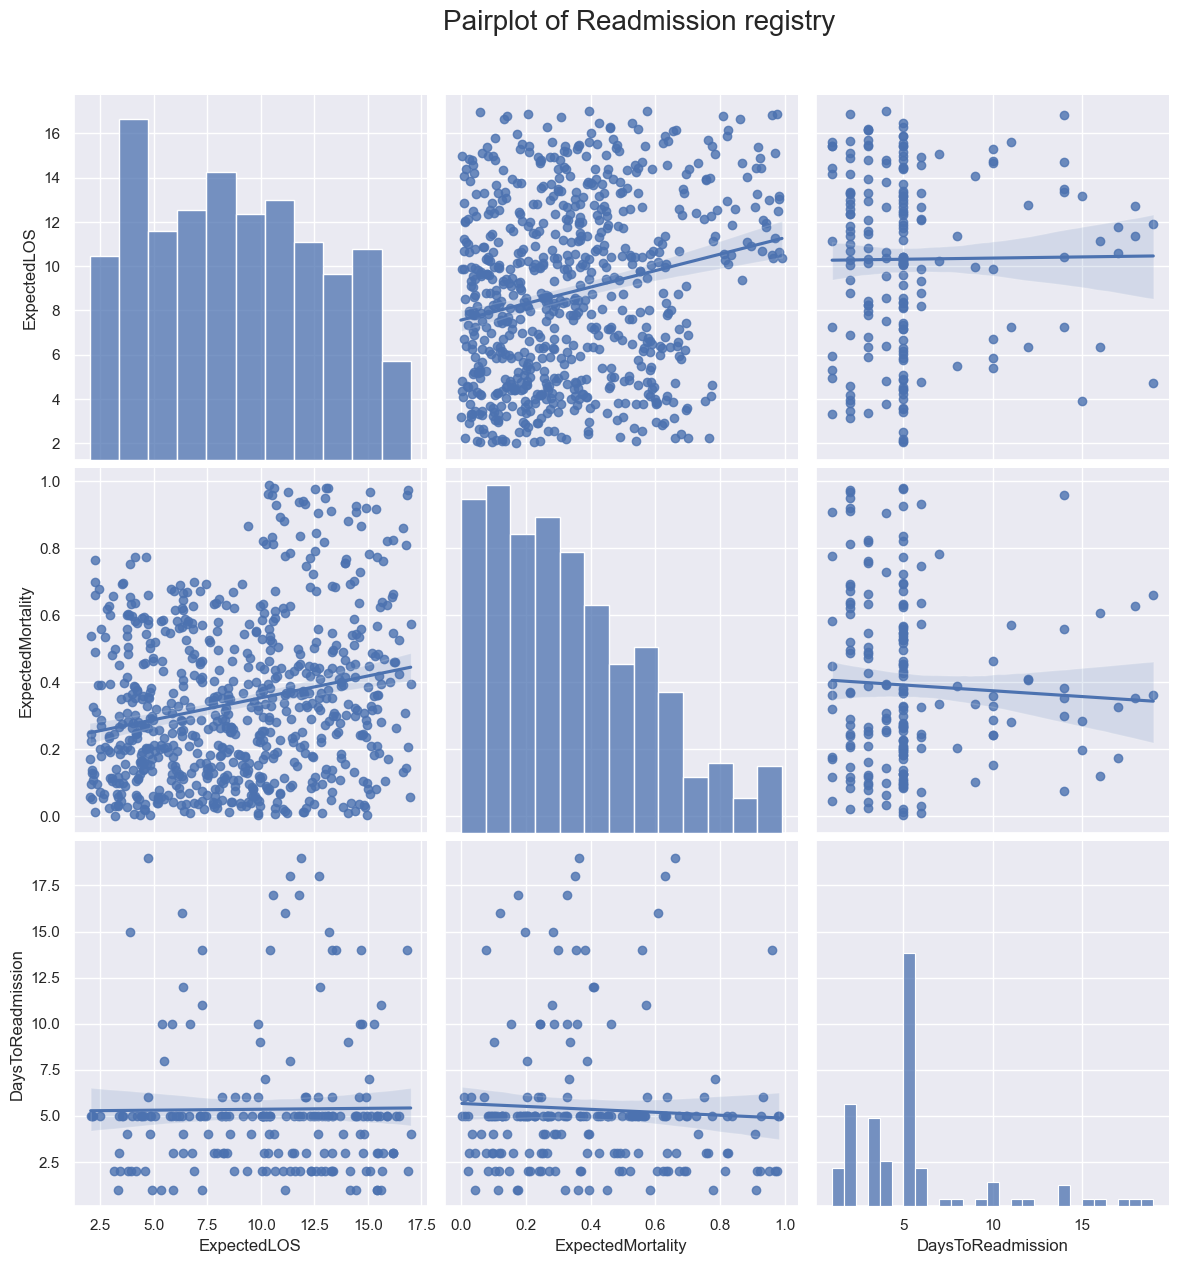

In [18]:
sns.pairplot(df_rr,height = 4,palette = 'CMRmap',kind="reg")
plt.title('Pairplot of Readmission registry',y=3.2,x=-0.5,fontsize=20)
plt.show()

5.Display data by splitting age in 4 quartiles and labeling the quartiles.


In [19]:
df_pa['Converted_dob']=df_pa['DateOfBirth'].dt.strftime("%d/%m/%Y")
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
df_pa['Age'] = df_pa['Converted_dob'].apply(age)

Quartile_Age =df_pa['Age'].quantile([ 0.25,  0.5, 0.75,1])
index_Label = (['1st Quantile','2nd Quantile','3rd Quantile','4th Quantile']) 
Quartile_Age.index =index_Label
Quartile_Age

1st Quantile    45.0
2nd Quantile    51.0
3rd Quantile    58.0
4th Quantile    65.0
Name: Age, dtype: float64

In [ ]:
6.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.


<Figure size 1500x600 with 0 Axes>

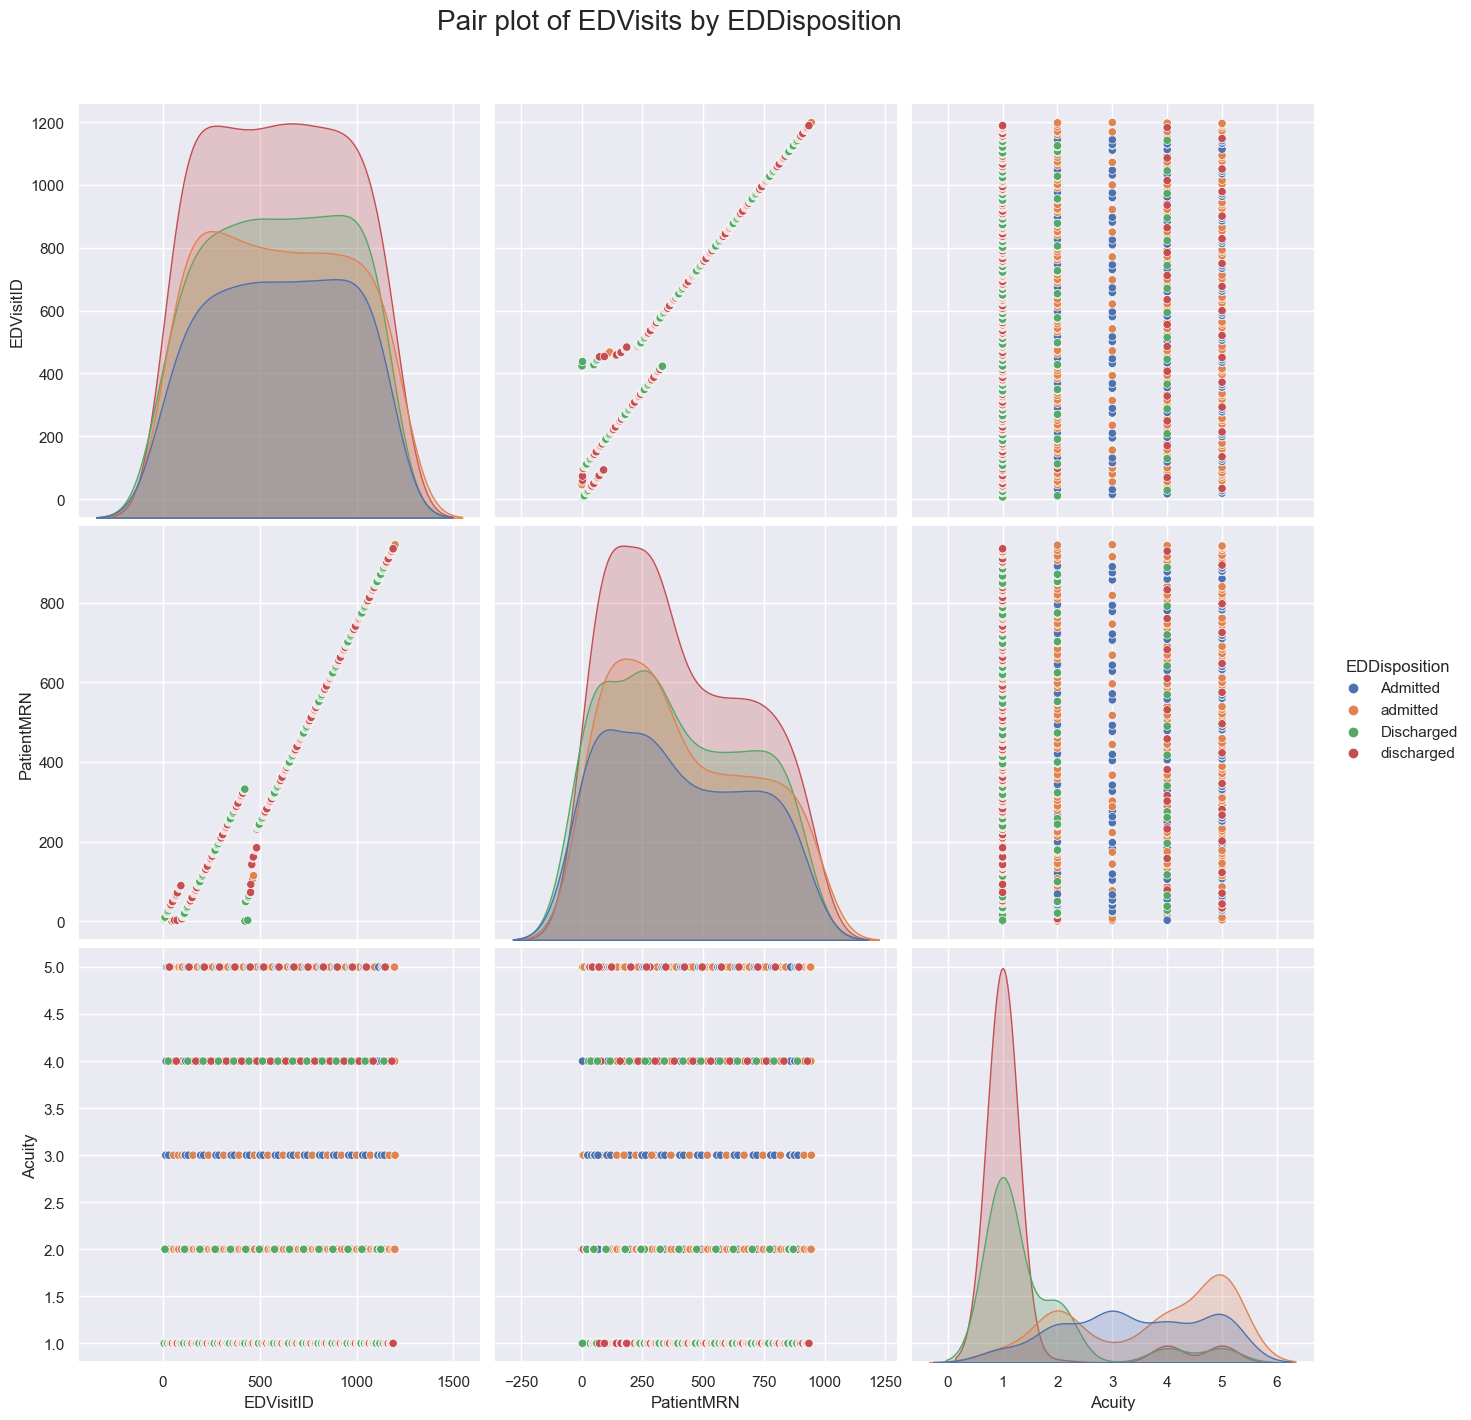

In [25]:
plt.figure(figsize=(15,6))

sns.pairplot(df_ed, hue='EDDisposition',height=4.5)
plt.title("Pair plot of EDVisits by EDDisposition",y=3.2,x=-0.6,fontsize=20)
plt.show()

7.Create a bar chart between expectedLOS & Primary diagnosis.


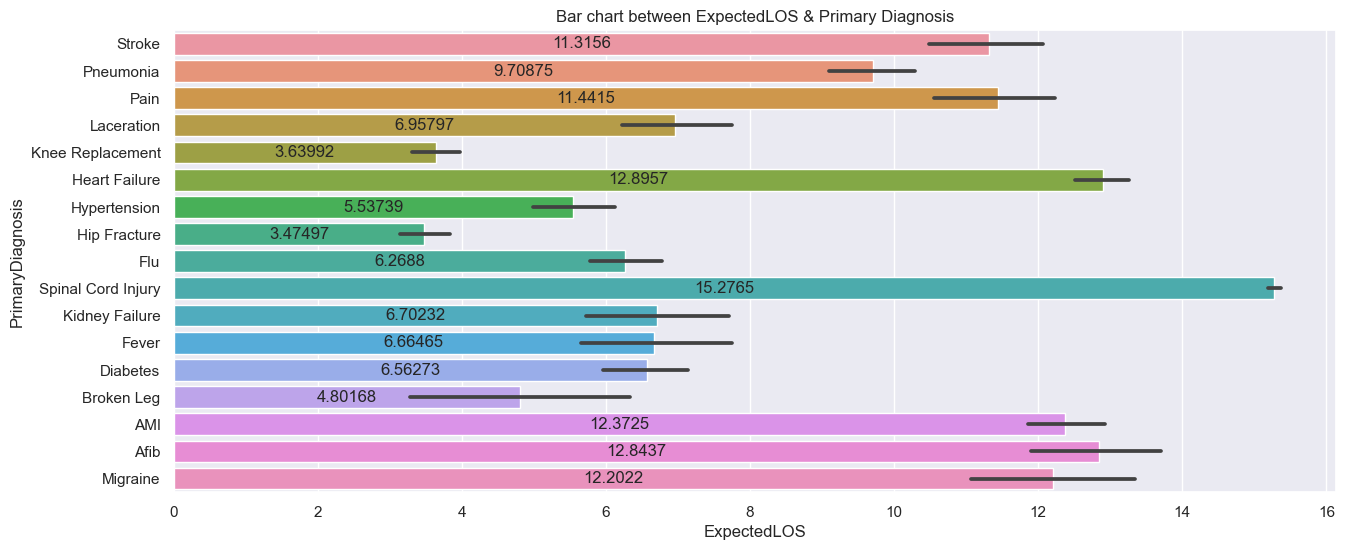

In [26]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='ExpectedLOS',y='PrimaryDiagnosis',data=df_rr)
ax.bar_label(ax.containers[0], label_type='center')
plt.title("Bar chart between ExpectedLOS & Primary Diagnosis")
plt.show()

9.Create a boxplot on ExpectedLOS by taking service into account.

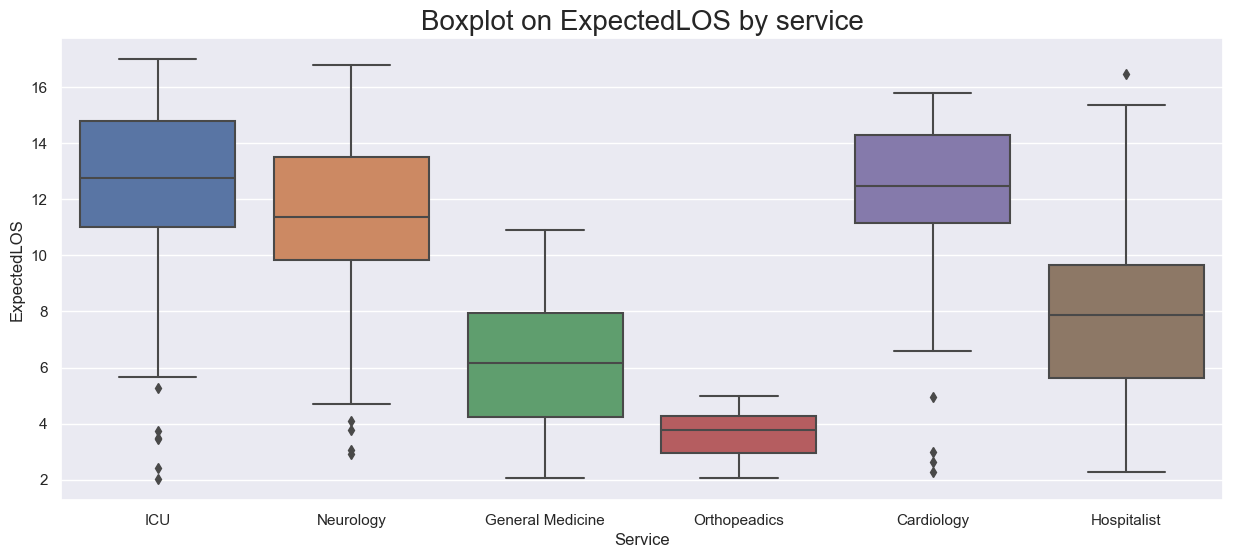

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot(y='ExpectedLOS',x='Service',data=df_rr)
plt.title("Boxplot on ExpectedLOS by service",fontsize=20)
plt.show()

10.Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

<Figure size 1500x600 with 0 Axes>

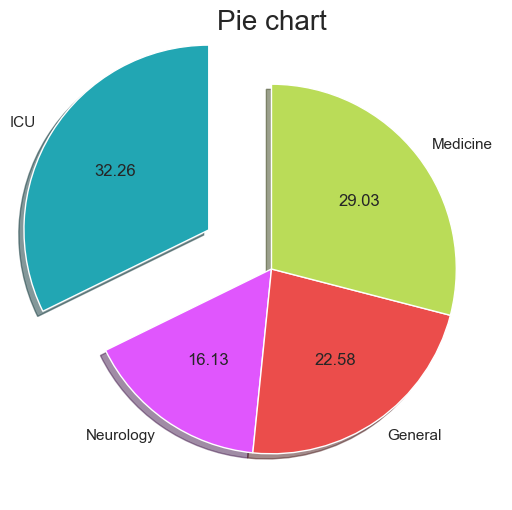

In [30]:
plt.figure(figsize=(15,6))
service= ["ICU", "Neurology", "General", "Medicine"]
ExpectedLOS=[10,5,7,9]
outside = (0.4, 0, 0, 0) 
colors = ('#22a6b3', '#e056fd', '#eb4d4b', '#badc58')
# Pie Chart
plt.figure(figsize=(15,6))
plt.pie(ExpectedLOS, labels=service, explode=outside, autopct="%.2f", shadow=True, startangle=90,colors=colors) 
plt.title("Pie chart",fontsize=20)
plt.show()


11.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

<Figure size 1500x600 with 0 Axes>

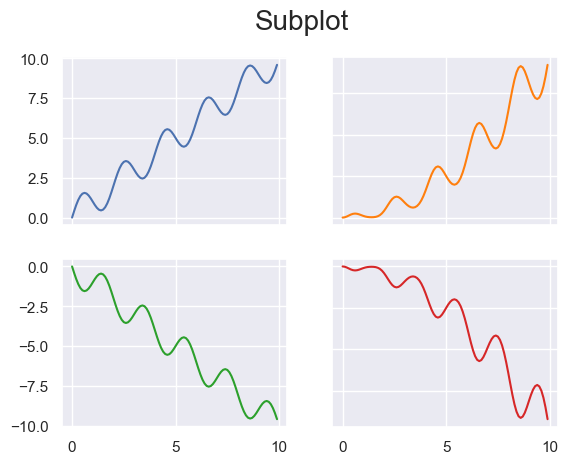

In [31]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Subplot',fontsize=20)
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

12.Plot a graph to show the distribution of expected length

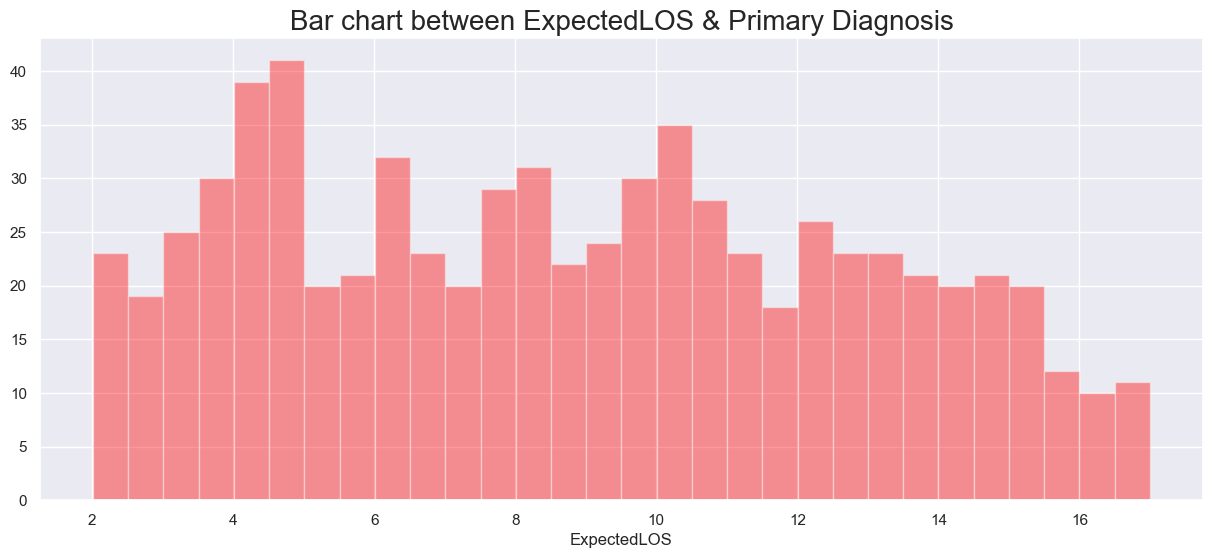

In [33]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
sns.distplot(df_rr['ExpectedLOS'],kde=False,bins=30, color='red')
plt.title("Bar chart between ExpectedLOS & Primary Diagnosis",fontsize=20)
plt.show()


13.Create a heat map to show the correlation between the column values of Edvisits.

In [36]:
EDCorr=df_ed.corr()
EDCorr


,EDVisitID,PatientMRN,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientMRN,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


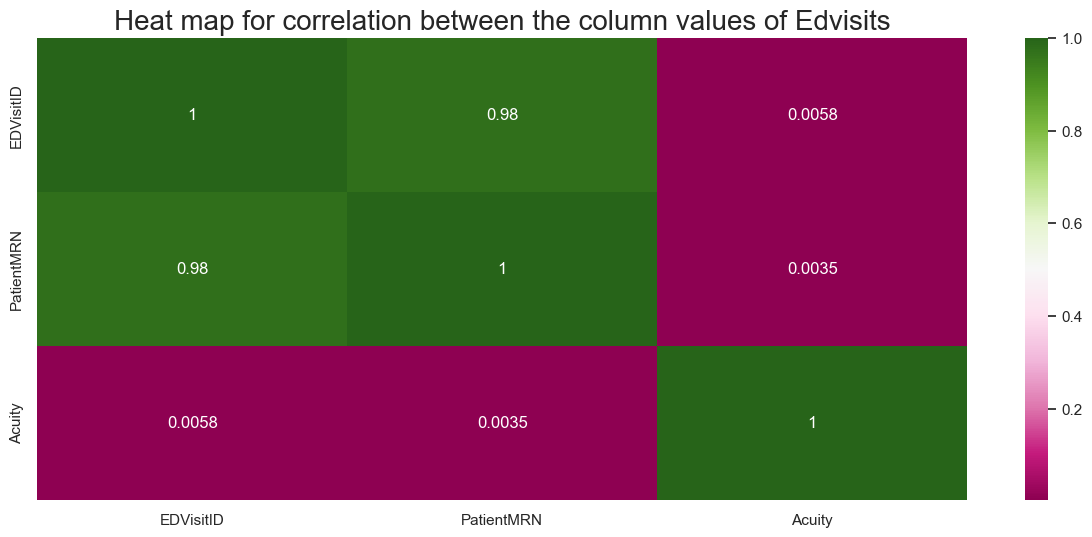

In [37]:
plt.figure(figsize=(15,6))
sns.heatmap(EDCorr,annot=True,cmap='PiYG')
plt.title("Heat map for correlation between the column values of Edvisits",fontsize=20)
plt.show()


14.Add column 'Age' in Patient table.


In [38]:
import datetime 
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df7=df_pa['DateOfBirth'].apply(lambda x: from_dob_to_age(x))
df7
df_pa['Age']=df7
df_pa


,PatientMRN,FirstName,LastName,DateOfBirth,Gender,Race,Language,Converted_dob,Age
0,1,NaN,NaN,1960-01-01 00:00:00.000,Male,White,English,01/01/1960,65
1,2,NaN,NaN,1985-11-15 02:08:42.090,Male,White,English,15/11/1985,39
2,3,NaN,NaN,1976-04-15 02:52:09.762,Male,White,English,15/04/1976,48
3,4,NaN,NaN,1968-10-15 03:32:13.635,Male,White,English,15/10/1968,56
4,5,NaN,NaN,1962-05-01 19:12:58.950,Male,White,English,01/05/1962,62
...,...,...,...,...,...,...,...,...,...
940,941,NaN,NaN,1986-05-26 00:01:19.761,Male,Black/African-American,English,26/05/1986,38
941,942,NaN,NaN,1970-06-10 21:41:03.814,Male,Black/African-American,English,10/06/1970,54
942,943,NaN,NaN,1983-01-08 21:49:27.884,Male,Black/African-American,English,08/01/1983,42
943,944,NaN,NaN,1963-06-05 07:57:05.569,Male,Black/African-American,English,05/06/1963,61


15.Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [40]:
df=pd.DataFrame()
df['Dates'] = pd.to_datetime(df_rr['DischargeDate']).dt.date
df['Time'] = pd.to_datetime(df_rr['DischargeDate']).dt.time
df


,Dates,Time
0,2018-01-07,20:50:16.780000
1,2018-01-19,11:17:38.763000
2,2018-01-23,03:03:40.672000
3,2018-02-05,11:33:38.318000
4,2018-02-06,06:51:07.293000
...,...,...
715,2018-01-29,08:24:40.841000
716,2018-01-27,06:31:22.398000
717,2018-02-10,03:49:38.425000
718,2018-02-22,21:40:31.175000


16.Count of number of patients admitted based on Primary Diagnosis and Service provided.

In [41]:
df_dis.groupby(['PrimaryDiagnosis','Service'])['PatientID'].count()


PrimaryDiagnosis    Service         
AMI                 Cardiology          40
                    Hospitalist          1
                    ICU                  5
                    Neurology            2
Afib                Cardiology          10
                    ICU                  1
Broken Leg          Cardiology           3
                    General Medicine     3
                    Hospitalist          3
Diabetes            General Medicine    38
                    Hospitalist         26
Fever               General Medicine    13
                    Hospitalist          3
                    ICU                  3
Flu                 Cardiology           2
                    General Medicine    54
                    Hospitalist         19
                    ICU                  3
                    Neurology            2
Heart Failure       Cardiology          39
                    ICU                 33
                    Neurology            6
Hip Fracture     

17.Plot a graph by counting the no. of patients in each department.


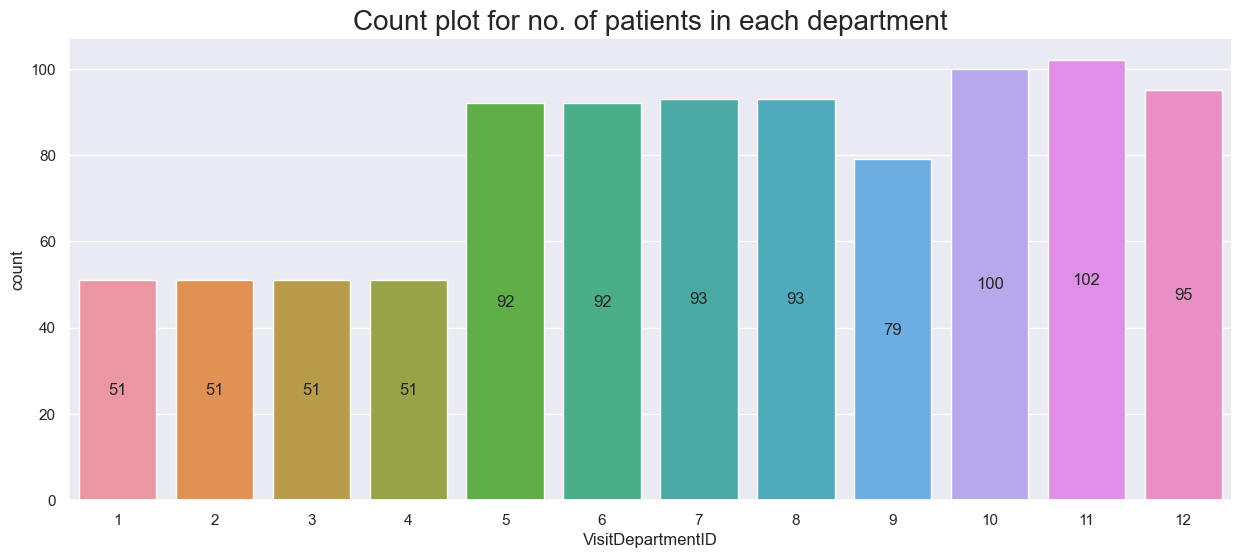

In [47]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='VisitDepartmentID',data=df_av)
ax.bar_label(ax.containers[0], label_type='center')
plt.title("Count plot for no. of patients in each department",fontsize=20)
plt.show()

18.Using arrays and loops, find the count of patients based on gender.

In [48]:
lst=np.array(df_pa[['Gender']])
    
m_count=0
f_count=0
for x in lst:
    
    if x== "Male":
        m_count +=1 
    else :
        f_count +=1
        
print ("Total Male patients:", m_count)

print ("Total Female patients:",f_count)

Total Male patients: 498
Total Female patients: 447


19.Plot a graph to count the patients based on discharge disposition.

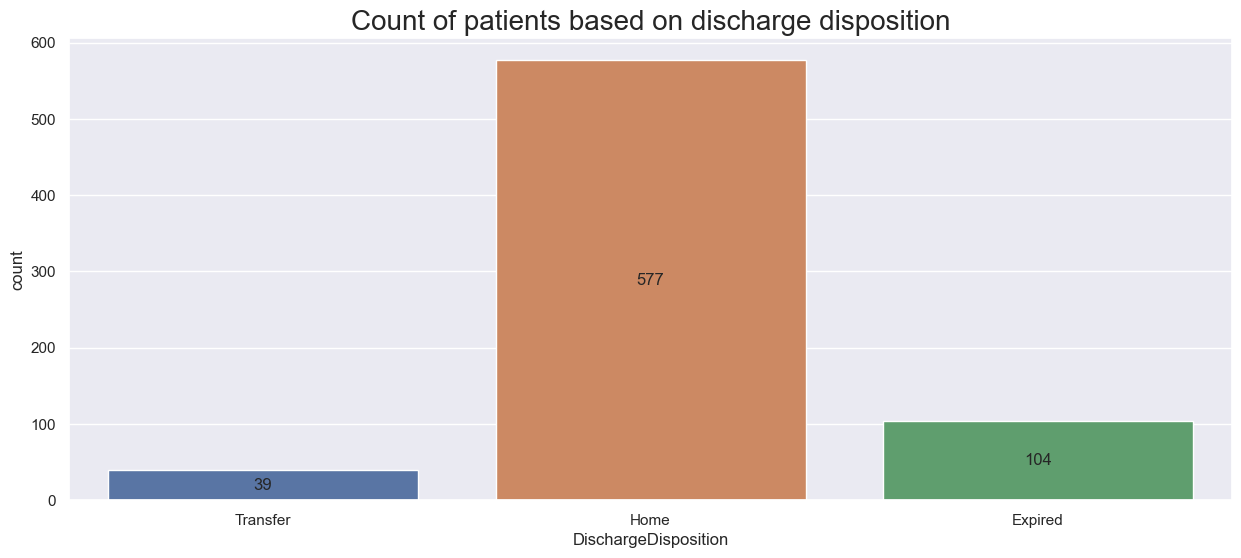

In [49]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='DischargeDisposition',data=df_rr)
ax.bar_label(ax.containers[0], label_type='center')
plt.title("Count of patients based on discharge disposition",fontsize=20)
plt.show()


20.Calculate average LOS.

In [50]:
df_dis['ExpectedLOS'].mean()


8.824589159156147

21.Which patient id has most entries in readmission registry.

In [51]:
admn_reg =df_rr['PatientID'].value_counts().sort_values(ascending = False)
print('Patient ID having more entries and their counts ' ,admn_reg.head(1))

Patient ID having more entries and their counts  23    3
Name: PatientID, dtype: Int64


22.Find the count of White Spanish Male.

In [54]:
count=df_pa['PatientMRN'][(df_pa['Race']=='White') & (df_pa['Language']=='Spanish') & (df_pa['Gender']=='Male')].count()
print("Total count of White Spanish Male patients are:", 15)

Total count of White Spanish Male patients are: 15


23.Using a bar chart, which Service had the lowest count of Expected Mortality?

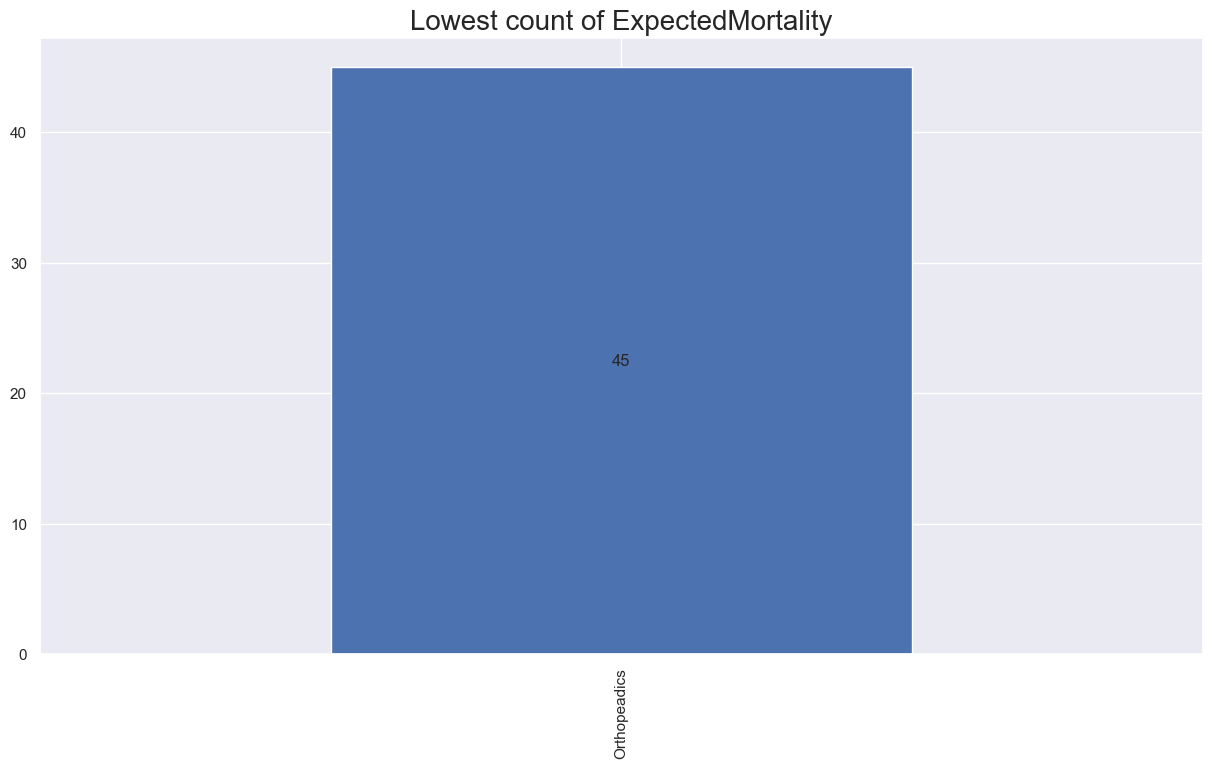

In [55]:
sns.set(style="darkgrid")
low_count = df_rr['Service'].value_counts().tail(1)
ax=low_count.plot(kind='bar',figsize=(15,8))
ax.bar_label(ax.containers[0], label_type='center')
plt.title('Lowest count of ExpectedMortality',fontsize=20)
plt.show()

24.Create a correlation matrix on EDVisits.


In [57]:
EDCorr=df_ed.corr()
EDCorr


,EDVisitID,PatientMRN,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientMRN,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


Text(0.5, 1.0, 'Correlation matrix on EDVisits')

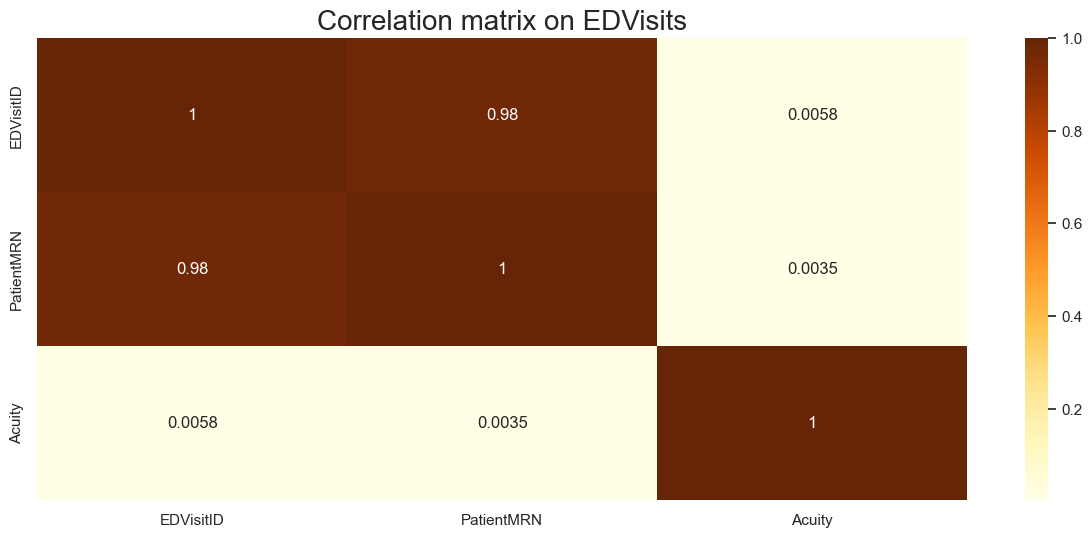

In [58]:
plt.figure(figsize=(15,6))
sns.heatmap(EDCorr,annot=True,cmap='YlOrBr')
plt.title("Correlation matrix on EDVisits",fontsize=20)

25.Number of patients on 'Transfer' based on primary diagnosis.

In [59]:
flt = df_rr['DischargeDisposition']=='Transfer'
df_rr.loc[flt]['PrimaryDiagnosis'].value_counts()

Stroke              9
Heart Failure       9
Pneumonia           8
Diabetes            7
Flu                 2
Pain                1
Laceration          1
Knee Replacement    1
Afib                1
Name: PrimaryDiagnosis, dtype: int64

26.Plot a graph showing the count of patients for the reason visited the hospital.

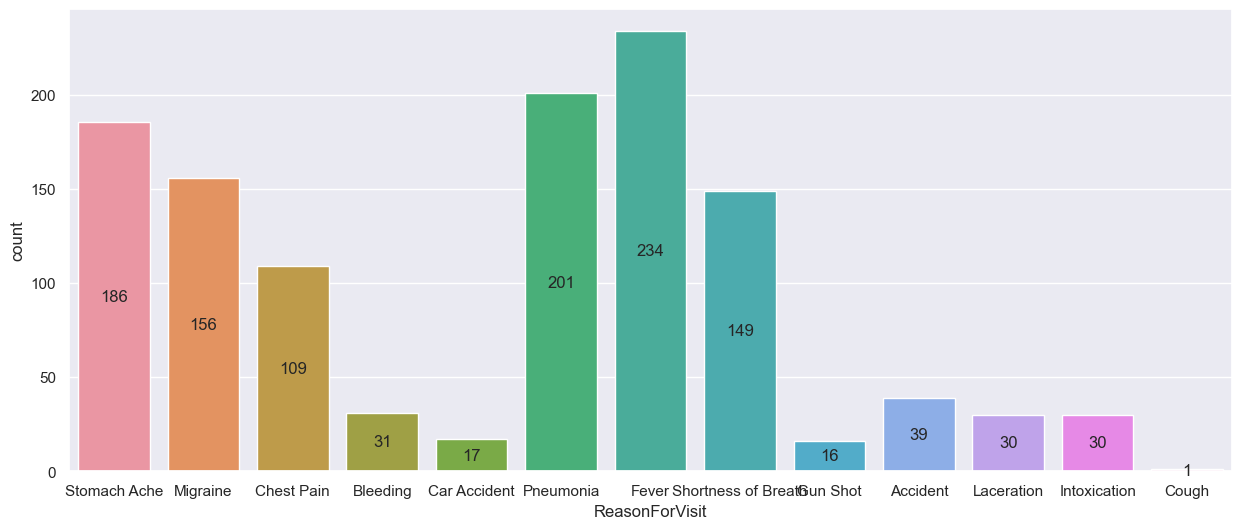

In [60]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
ax=sns.countplot(x='ReasonForVisit',data=df_ed)
ax.bar_label(ax.containers[0], label_type='center')
plt.show()

27.Find the visit type with maximum 'No Show'.

In [61]:
df_count = df_av.groupby('VisitType')['VisitStatus'].apply(lambda x: (x=='No Show').sum()).reset_index(name='count')
df_count.max()

VisitType    Telemedicine
count                  74
dtype: object

28.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [62]:
flt =(df_pro['ProviderID']>=11) & (df_pro['ProviderID']<=20) & (df_pro['ProviderSpecialty']=='Surgery')
x = df_pro.loc[flt]
x

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


29.Calculate mortality by diagnosis.

In [ ]:
df_dis.groupby('PrimaryDiagnosis')['ExpectedMortality'].sum().round(2)


30.Create a bar chart on service & expected length of stay.

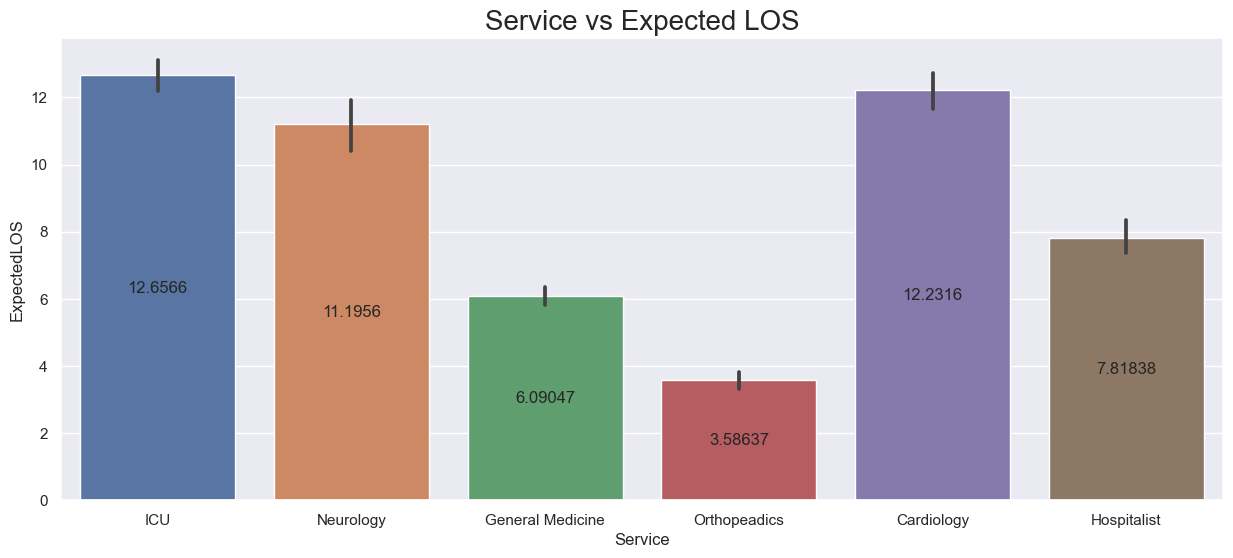

In [64]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data = df_rr,x='Service',y='ExpectedLOS')
ax.bar_label(ax.containers[0], label_type='center')
plt.title('Service vs Expected LOS',fontsize=20)
plt.show()